In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

dataset: https://www.kaggle.com/datasets/shiivvvaam/bitcoin-historical-data?fbclid=IwZXh0bgNhZW0CMTAAAR3P6HX5Gwe3oMVlGpOruClWEgkLpo2K84Amb3tuSqEO9K29ub18YfQUukY_aem_ZmFrZWR1bW15MTZieXRlcw


In [28]:
df = pd.read_csv("BitcoinHistory.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%
...,...,...,...,...,...,...,...
4950,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4951,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4952,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4953,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [29]:
df.isnull()

,Date,Price,Open,High,Low,Vol.,Change %
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4950,False,False,False,False,False,False,False
4951,False,False,False,False,False,False,False
4952,False,False,False,False,False,False,False
4953,False,False,False,False,False,False,False


In [30]:
df.dropna()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%
...,...,...,...,...,...,...,...
4950,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4951,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4952,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4953,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [31]:
df['Change %'] = df['Change %'].str.rstrip('%').astype('float') / 100
    

In [32]:
#wielkość dataframu po usunięciu pustych pozycji 
df.dtypes

Date         object
Price        object
Open         object
High         object
Low          object
Vol.         object
Change %    float64
dtype: object

In [33]:
df = df.rename(columns={'Vol.': 'Vol', 'Change %': 'Change'})

USTAWIAMY WŁAŚCIWY FORMAT DLA DANYCH

In [34]:
# Konwersja kolumn na stringi przed usunięciem przecinków
columns_to_convert = ['Price', 'Open', 'High', 'Low']
for column in columns_to_convert:
    df[column] = df[column].astype(str).str.replace(',', '').astype(float)


#kolumny 'Vol' nie ruszamy, ponieważ i tak nie będziemy z niej korzystać

In [35]:
df.head(10)

,Date,Price,Open,High,Low,Vol,Change
0,"Feb 09, 2024",47545.4,45293.3,47710.2,45254.2,86.85K,0.0497
1,"Feb 08, 2024",45293.3,44346.2,45579.2,44336.4,66.38K,0.0215
2,"Feb 07, 2024",44339.8,43088.4,44367.9,42783.5,48.57K,0.0291
3,"Feb 06, 2024",43087.7,42697.6,43375.5,42566.8,33.32K,0.0091
4,"Feb 05, 2024",42697.2,42581.4,43532.2,42272.5,39.26K,0.0027
5,"Feb 04, 2024",42581.4,43006.2,43113.2,42379.4,20.33K,-0.0099
6,"Feb 03, 2024",43005.7,43194.7,43370.4,42882.0,14.57K,-0.0044
7,"Feb 02, 2024",43194.7,43083.7,43459.3,42596.3,42.65K,0.0026
8,"Feb 01, 2024",43081.4,42580.1,43263.1,41890.5,47.69K,0.0118
9,"Jan 31, 2024",42580.5,42946.2,43739.7,42315.4,56.48K,-0.0085


In [36]:
#sprawdzamy typy danych w poszczególnych kolumnach
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Vol        object
Change    float64
dtype: object

In [37]:
df.head()

,Date,Price,Open,High,Low,Vol,Change
0,"Feb 09, 2024",47545.4,45293.3,47710.2,45254.2,86.85K,0.0497
1,"Feb 08, 2024",45293.3,44346.2,45579.2,44336.4,66.38K,0.0215
2,"Feb 07, 2024",44339.8,43088.4,44367.9,42783.5,48.57K,0.0291
3,"Feb 06, 2024",43087.7,42697.6,43375.5,42566.8,33.32K,0.0091
4,"Feb 05, 2024",42697.2,42581.4,43532.2,42272.5,39.26K,0.0027


In [38]:
#sprawdzamy, czy po wszytskich przekształceniach mamy jeszcze jakieś NaN-y
df['Price'].isna().sum()

0

ZAPOZNANIE SIĘ Z DANYMI

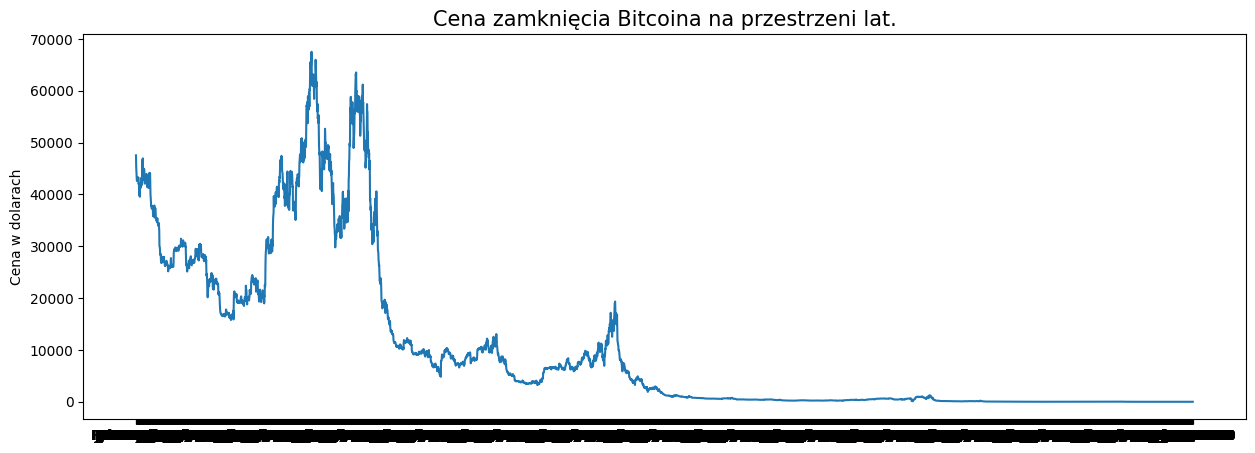

In [39]:
#jak na przetrzeni lat kształtowała się cena zamknięcia Bitcoina
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Price'])
plt.title('Cena zamknięcia Bitcoina na przestrzeni lat.', fontsize=15)
plt.ylabel('Cena w dolarach')
plt.show()

Podzielenie zmiennych na X i Y oraz ustalenie podziału na zbiór treningowy i walidacyjny

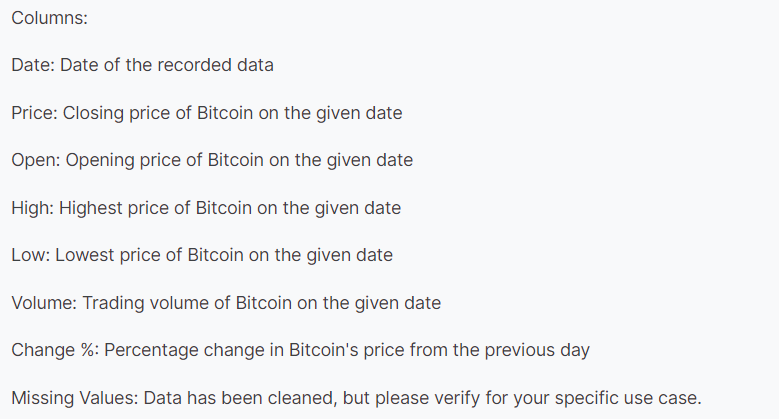

In [40]:
# Wybór zmiennych wejściowych (features) i zmiennej wyjściowej (target)
features = df[['Open', 'High', 'Low', 'Change']]
target = df['Price']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [41]:
# Inicjalizacja modelu regresji drzewa decyzyjnego
model = DecisionTreeRegressor(max_depth=3 ,random_state=42)

# Trenowanie modelu
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

In [42]:
#DRUGI MODEL Z WIĘKSZYM PARAMETREM MAX_DEPTH
# Inicjalizacja modelu regresji drzewa decyzyjnego
model2 = DecisionTreeRegressor(max_depth=4 ,random_state=42)

# Trenowanie modelu
model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [43]:
# Przewidywanie na zbiorze testowym
y_pred1 = model.predict(X_test)

# Ocena modelu za pomocą średniego błędu kwadratowego (MSE)
mse1 = mean_squared_error(y_test, y_pred1)
print(f'Mean Squared Error: {mse1}')


Mean Squared Error: 3069900.740941505


In [44]:
# Przewidywanie na zbiorze testowym
y_pred2 = model2.predict(X_test)

# Ocena modelu za pomocą średniego błędu kwadratowego (MSE)
mse2 = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 919492.9116219202


RMSE 

In [45]:
import math
#RMSE dla modelu 1
RMSE1 = math.sqrt(mse1)
print(RMSE1)
#RMSE dla modelu 2
RMSE2 = math.sqrt(mse2)
print(RMSE2)

1752.113221496118
958.9019301377593


R^2 

In [46]:
from sklearn.metrics import r2_score
#r-squared dla modelu 1
r2_1 = r2_score(y_test, y_pred1)
print(r2_1)
#r-squared dla modelu 2
r2_2 = r2_score(y_test, y_pred2)
print(r2_2)


0.9878338832180847
0.9963560195957656


In [47]:
# Przykładowe dane do przewidywania (można je dostosować do nowych danych)
new_data = pd.DataFrame({
    'Open': [35000],
    'High': [37000],
    'Low': [34000],
    'Change': [0.15]
})

# Przewidywanie ceny zamknięcia
predicted_close_price = model.predict(new_data)
print(f'Predicted Close Price: {predicted_close_price[0]}')


Predicted Close Price: 35173.23605442177


In [48]:
# Przykładowe dane do przewidywania (można je dostosować do nowych danych)
new_data = pd.DataFrame({
    'Open': [35000],
    'High': [37000],
    'Low': [34000],
    'Change': [0.15]
})

# Przewidywanie ceny zamknięcia
predicted_close_price = model2.predict(new_data)
print(f'Predicted Close Price: {predicted_close_price[0]}')

Predicted Close Price: 37006.59523809523


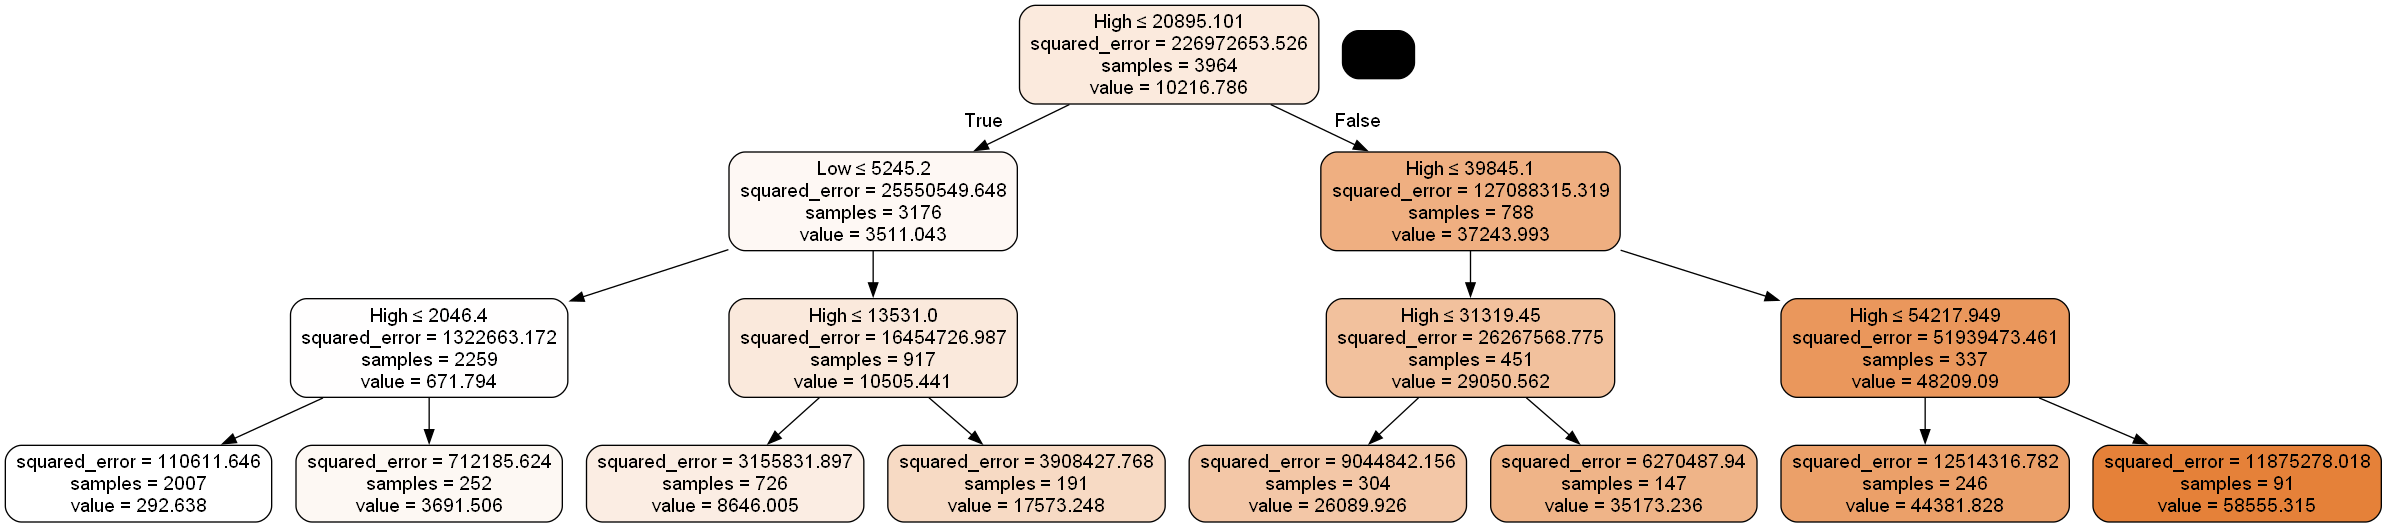

In [49]:
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('close_price.png')
Image(graph.create_png())


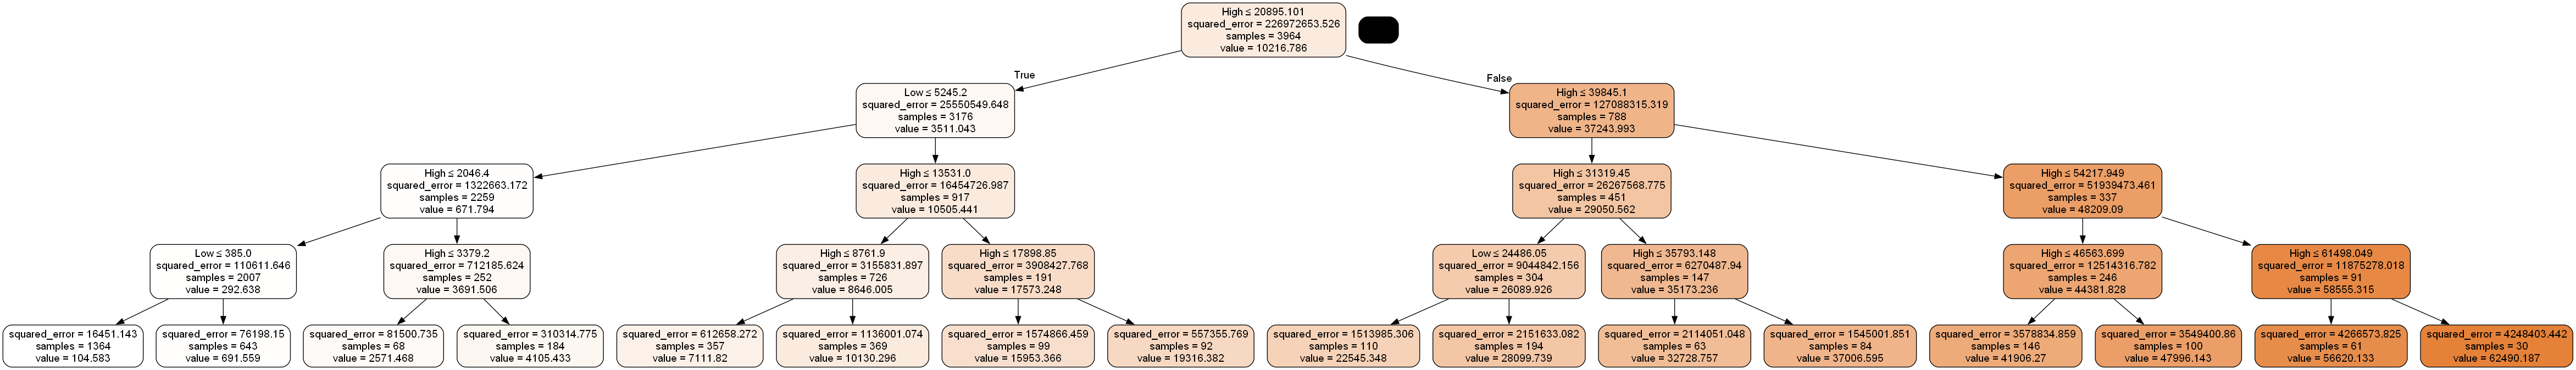

In [50]:
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('close_price_for_model2.png')
Image(graph.create_png())

WAŻNOŚĆ POSZCZEGÓLNYCH ZMIENNYCH NIEZALEŻNYCH

Feature ranking:
1. Feature 'High' (0.9290093189626691)
2. Feature 'Low' (0.07099068103733093)
3. Feature 'Change' (0.0)
4. Feature 'Open' (0.0)


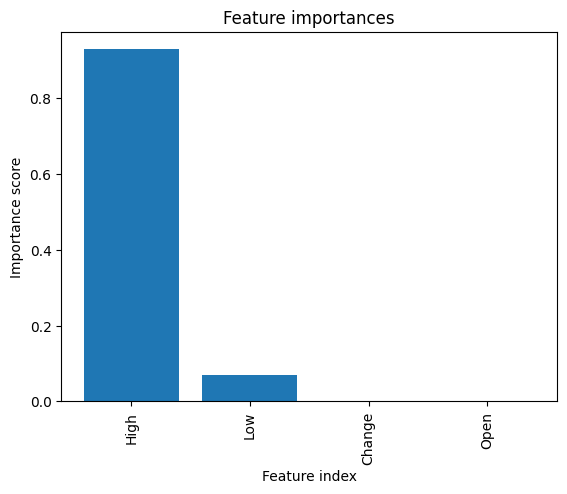

In [51]:
import numpy as np
feature_names =  ['Open', 'High', 'Low', 'Change']
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]})")

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature index")
plt.ylabel("Importance score")
plt.show()

Feature ranking:
1. Feature 'High' (0.9270735699199982)
2. Feature 'Low' (0.07292643008000178)
3. Feature 'Change' (0.0)
4. Feature 'Open' (0.0)


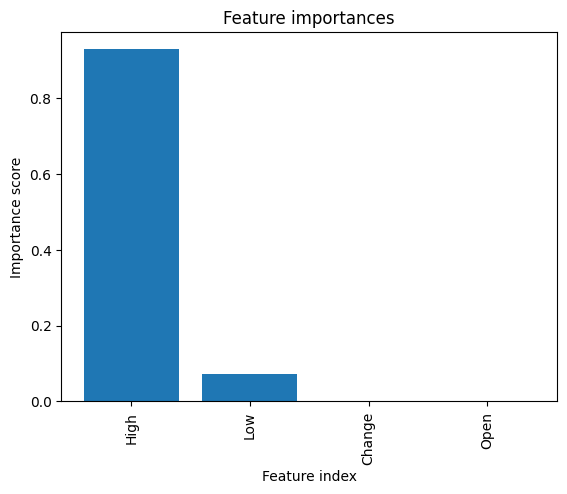

In [52]:
import numpy as np
feature_names =  ['Open', 'High', 'Low', 'Change']
# Get feature importances
importances = model2.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]})")

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature index")
plt.ylabel("Importance score")
plt.show()